In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string

In [2]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

##### Extracting a title

In [15]:
x = page.get_text(strip=True)
y = [i for i in x.split()]
y[:5]

['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA']

In [22]:
print(soup.title.text)

PHP: Hypertext Preprocessor


In [23]:
# convert that text into tokens by splitting

text = soup.get_text(strip=True)
tokens = [t for t in text.split()]
tokens[:5]

['PHP:',
 'Hypertext',
 'PreprocessorDownloadsDocumentationGet',
 'InvolvedHelpGetting',
 'StartedIntroductionA']

##### Stopwords

In [24]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

##### Punctuation

In [25]:
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##### Lowercase

In [50]:
words = []
for word in tokens:
    words.append(word.lower())
words[:5]

['php:',
 'hypertext',
 'preprocessordownloadsdocumentationget',
 'involvedhelpgetting',
 'startedintroductiona']

##### Extracting clean words

In [27]:
clean_words = []
for i in tokens:
    if i not in stop_words:
        if i not in punctuation:
            clean_words.append(i.lower())
            
clean_words[:5]

['php:',
 'hypertext',
 'preprocessordownloadsdocumentationget',
 'involvedhelpgetting',
 'startedintroductiona']

In [44]:
# calculate the frequency of those tokens using Python NLTK.

counts = nltk.FreqDist(clean_words) 
for key,val in counts.items(): 
    print(str(key) + ' : ' + str(val))

php: : 1
hypertext : 1
preprocessordownloadsdocumentationget : 1
involvedhelpgetting : 1
startedintroductiona : 1
simple : 1
tutoriallanguage : 1
referencebasic : 1
syntaxtypesvariablesconstantsexpressionsoperatorscontrol : 1
structuresfunctionsclasses : 1
objectsnamespaceserrorsexceptionsgeneratorsattributesreferences : 1
explainedpredefined : 1
variablespredefined : 1
exceptionspredefined : 1
interfaces : 1
classescontext : 1
options : 1
parameterssupported : 1
protocols : 1
wrapperssecurityintroductiongeneral : 1
considerationsinstalled : 1
cgi : 1
binaryinstalled : 1
apache : 1
modulesession : 1
securityfilesystem : 1
securitydatabase : 1
securityerror : 1
reportingusing : 1
register : 1
globalsuser : 1
submitted : 1
datahiding : 1
phpkeeping : 1
currentfeatureshttp : 1
authentication : 1
phpcookiessessionsdealing : 1
xformshandling : 1
file : 1
uploadsusing : 1
remote : 1
filesconnection : 1
handlingpersistent : 1
database : 1
connectionscommand : 1
line : 2
usagegarbage : 1
colle

In [52]:
print(f"Total including stopwords : {len(words)}")
print(f"Length after removing stopwords and punctuations : {len(clean_words)}")
print(f"Total removed stopwords and punctuations : {len(words)-len(clean_words)}")

Total including stopwords 		: 2557
Length after removing stopwords and punctuations : 1802
Total removed stopwords and punctuations : 755


In [47]:
print(f'Most common words : \n{counts.most_common(10)}')
print(f'\nMax common word : {counts.max()}')

Most common words : 
[('php', 112), ('release', 69), ('found', 49), ('source', 41), ('please', 26), ('list', 26), ('team', 25), ('downloads', 25), ('visit', 25), ('version.for', 24)]

Max common word : php


In [48]:
print(f'Frequency of most common word : {counts.freq(counts.max())}')

Frequency of most common word : 0.06215316315205328


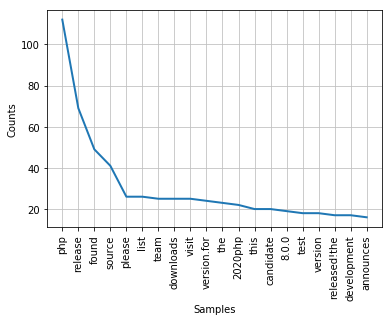

In [49]:
counts.plot(20, cumulative=False)
pass